In [1]:
import pandas as pd
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import argparse
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
#motif_short="HNF4G_MA0484.1"
#motif_short="CTCF_MA0139.1"
#motif_short="NRF1_MOUSE.H11MO.0.A"
#motif_short="REL_MA0101.1"
#motif_short="SP1_HUMAN.H11MO.0.A"
motif_short="NFYC_HUMAN.H11MO.0.A"
#motif_short="RUNX3_HUMAN.H11MO.0.A"
#motif_short="SPI1_MOUSE.H11MO.0.A"
#motif_short="BATF3_HUMAN.H11MO.0.B"

chip_labels=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/chip-seq/"+motif_short+"/chip_intersect_50bp.bed", sep="\t", header=None)
celltype="GM12878"

#motif_name="NRF1_HUMAN.H11MO.0.A_NRF1_HUMAN.H11MO.0.A"

In [3]:
file_id=celltype+"_mean_counts_ATAC_PE"
moods_dir = "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/output/"+file_id+"/"+motif_name+"/beds/"
counts_atac = pd.read_csv(moods_dir+motif_name+"_all.bed", sep="\t", header=None)



In [4]:
counts_atac.head()

,0,1,2,3,4,5,6,7,8,9
0,chr1,778742,778751,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.72908,+,chr1,777903,779619,0.02400
1,chr1,804591,804600,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.07180,+,chr1,804066,806014,0.00000
2,chr1,959996,960005,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,8.52048,-,chr1,958767,961066,0.00142
3,chr1,1000183,1000192,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.97662,+,chr1,999708,1001386,0.04431
4,chr1,1019520,1019529,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.85185,+,chr1,1018717,1022146,0.01488


In [5]:
file_id=celltype+"_mean_profile_ATAC_PE"
moods_dir = "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/output/"+file_id+"/"+motif_name+"/beds/"
cprofile_atac = pd.read_csv(moods_dir+motif_name+"_all.bed", sep="\t", header=None)



In [6]:
file_id=celltype+"_mean_counts_DNASE_SE"
moods_dir = "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/output/"+file_id+"/"+motif_name+"/beds/"
counts_dnase = pd.read_csv(moods_dir+motif_name+"_all.bed", sep="\t", header=None)




In [7]:
file_id=celltype+"_mean_profile_DNASE_SE"
moods_dir = "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/output/"+file_id+"/"+motif_name+"/beds/"
cprofile_dnase = pd.read_csv(moods_dir+motif_name+"_all.bed", sep="\t", header=None)



In [8]:
file_id=celltype+"_ATAC_TOBIAS"
moods_dir = "/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/syntax_stuff/06_25_2022_motif_scanning_tobias_toolkit/"+file_id+"/"+motif_name+"/beds/"
tobias_atac = pd.read_csv(moods_dir+motif_name+"_all.bed", sep="\t", header=None)

In [9]:
tobias_atac.head()

,0,1,2,3,4,5,6,7,8,9
0,chr1,778742,778751,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.72908,+,chr1,777903,779619,0.64256
1,chr1,804591,804600,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.07180,+,chr1,804066,806014,0.20053
2,chr1,959996,960005,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,8.52048,-,chr1,958767,961066,0.04603
3,chr1,1000183,1000192,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.97662,+,chr1,999708,1001386,0.48242
4,chr1,1019520,1019529,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.85185,+,chr1,1018717,1022146,0.45663


In [10]:
chip_labels.head()

,0,1,2,3,4,5,6,7,8,9,10
0,chr1,778742,778751,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.72908,+,chr1,777903,779619,0.02400,1
1,chr1,804591,804600,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.07180,+,chr1,804066,806014,0.00000,0
2,chr1,959996,960005,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,8.52048,-,chr1,958767,961066,0.00142,0
3,chr1,1000183,1000192,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.97662,+,chr1,999708,1001386,0.04431,0
4,chr1,1019520,1019529,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.85185,+,chr1,1018717,1022146,0.01488,1


In [11]:
sum(chip_labels[10]>0)
chip_labels[11]=chip_labels[10]>0

In [12]:
counts_dnase.head()

,0,1,2,3,4,5,6,7,8,9
0,chr1,778742,778751,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.72908,+,chr1,777903,779619,0.02009
1,chr1,804591,804600,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.07180,+,chr1,804066,806014,0.00000
2,chr1,959996,960005,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,8.52048,-,chr1,958767,961066,0.00000
3,chr1,1000183,1000192,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.97662,+,chr1,999708,1001386,0.03903
4,chr1,1019520,1019529,NFYC_HUMAN.H11MO.0.A_NFYC_HUMAN.H11MO.0.A,9.85185,+,chr1,1018717,1022146,0.00972


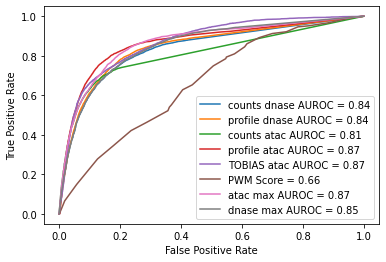

In [13]:
plt.figure()
label_col=11
dictionary={}

fpr_dnase_counts, tpr_dnase_counts, _ = roc_curve(chip_labels[label_col], counts_dnase[9])
roc_auc = auc(fpr_dnase_counts, tpr_dnase_counts)
label1="counts dnase AUROC = "+str(np.round(roc_auc,2))
dictionary["DNASE CHROMBPNET COUNTS"] = np.round(roc_auc,2)
plt.plot(fpr_dnase_counts, tpr_dnase_counts, label=label1)

fpr_dnase_profile, tpr_dnase_profile, _ = roc_curve(chip_labels[label_col], cprofile_dnase[9])
roc_auc = auc(fpr_dnase_profile, tpr_dnase_profile)
label1="profile dnase AUROC = "+str(np.round(roc_auc,2))
dictionary["DNASE CHROMBPNET PROFILE"] = np.round(roc_auc,2)

plt.plot(fpr_dnase_profile, tpr_dnase_profile, label=label1)

fpr_atac_counts, tpr_atac_counts, _ = roc_curve(chip_labels[label_col], counts_atac[9])
roc_auc = auc(fpr_atac_counts, tpr_atac_counts)
label1="counts atac AUROC = "+str(np.round(roc_auc,2))
dictionary["ATAC CHROMBPNET COUNTS"] = np.round(roc_auc,2)
plt.plot(fpr_atac_counts, tpr_atac_counts, label=label1)

fpr_atac_profile, tpr_atac_profile, _ = roc_curve(chip_labels[label_col], cprofile_atac[9])
roc_auc = auc(fpr_atac_profile, tpr_atac_profile)
label1="profile atac AUROC = "+str(np.round(roc_auc,2))
dictionary["ATAC CHROMBPNET PROFILE"] = np.round(roc_auc,2)
plt.plot(fpr_atac_profile, tpr_atac_profile, label=label1)



fpr_atac_TOBIAS, tpr_atac_TOBIAS, _ = roc_curve(chip_labels[label_col], tobias_atac[9])
roc_auc = auc(fpr_atac_TOBIAS, tpr_atac_TOBIAS)
label1="TOBIAS atac AUROC = "+str(np.round(roc_auc,2))
dictionary["ATAC TOBIAS"] = np.round(roc_auc,2)

plt.plot(fpr_atac_TOBIAS, tpr_atac_TOBIAS, label=label1)

fpr_atac_PWM, tpr_atac_PWM, _ = roc_curve(chip_labels[label_col], tobias_atac[4])
roc_auc = auc(fpr_atac_PWM, tpr_atac_PWM)
label1="PWM Score = "+str(np.round(roc_auc,2))
dictionary["PWM"] = np.round(roc_auc,2)
plt.plot(fpr_atac_PWM, tpr_atac_PWM, label=label1)


fpr_atac_profile, tpr_atac_profile, _ = roc_curve(chip_labels[label_col], np.max((cprofile_atac[9],counts_atac[9]), axis=0))
roc_auc = auc(fpr_atac_profile, tpr_atac_profile)
label1="atac max AUROC = "+str(np.round(roc_auc,2))
dictionary["ATAC CHROMBPNET MAX OF PROFILE/COUNTS"] = np.round(roc_auc,2)
plt.plot(fpr_atac_profile, tpr_atac_profile, label=label1)


fpr_atac_profile, tpr_atac_profile, _ = roc_curve(chip_labels[label_col], np.max((cprofile_dnase[9],counts_dnase[9]), axis=0))
roc_auc = auc(fpr_atac_profile, tpr_atac_profile)
label1="dnase max AUROC = "+str(np.round(roc_auc,2))
dictionary["DNASE CHROMBPNET MAX OF PROFILE/COUNTS"] = np.round(roc_auc,2)
plt.plot(fpr_atac_profile, tpr_atac_profile, label=label1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

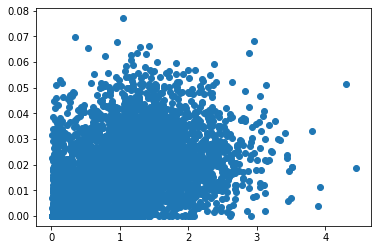

In [14]:
plt.scatter(tobias_atac[9][chip_labels[label_col]], counts_atac[9][chip_labels[label_col]] )

(0.5966021923630069, 0.0)

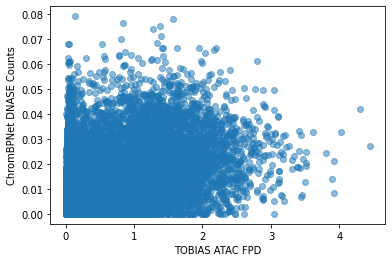

In [15]:
plt.figure()
plt.scatter(tobias_atac[9], counts_dnase[9], alpha=0.5)
plt.xlabel("TOBIAS ATAC FPD")
plt.ylabel("ChromBPNet DNASE Counts")

import scipy.stats
scipy.stats.pearsonr(tobias_atac[9],counts_dnase[9])

(0.7986474607263774, 0.0)

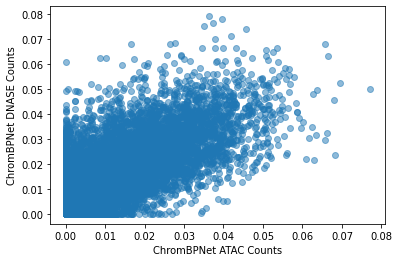

In [16]:
plt.figure()
plt.scatter(counts_atac[9], counts_dnase[9], alpha=0.5)
plt.xlabel("ChromBPNet ATAC Counts")
plt.ylabel("ChromBPNet DNASE Counts")

import scipy.stats
scipy.stats.pearsonr(counts_atac[9],counts_dnase[9])

(0.8583051867660398, 0.0)

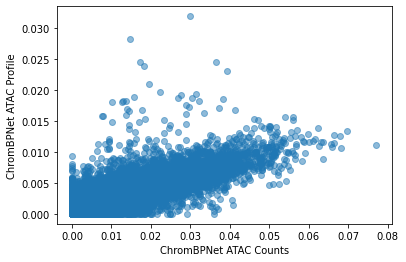

In [17]:
plt.figure()
plt.scatter(counts_atac[9], cprofile_atac[9], alpha=0.5)
plt.xlabel("ChromBPNet ATAC Counts")
plt.ylabel("ChromBPNet ATAC Profile")

import scipy.stats
scipy.stats.pearsonr(counts_atac[9],cprofile_atac[9])

(0.8718605224334988, 0.0)

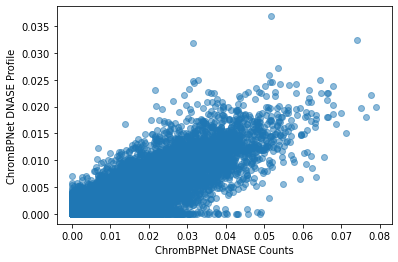

In [18]:
plt.figure()
plt.scatter(counts_dnase[9], cprofile_dnase[9], alpha=0.5)
plt.xlabel("ChromBPNet DNASE Counts")
plt.ylabel("ChromBPNet DNASE Profile")

import scipy.stats
scipy.stats.pearsonr(counts_dnase[9],cprofile_dnase[9])

(array([2.4556e+04, 7.2600e+02, 5.6500e+02, 4.5800e+02, 4.1700e+02,
        3.7000e+02, 2.7200e+02, 2.8800e+02, 2.4600e+02, 2.3400e+02,
        1.8800e+02, 1.9600e+02, 1.9500e+02, 1.9500e+02, 1.6400e+02,
        1.8600e+02, 1.4400e+02, 1.7700e+02, 1.7200e+02, 1.4400e+02,
        1.4800e+02, 1.3900e+02, 1.4000e+02, 1.2600e+02, 1.3300e+02,
        1.2200e+02, 1.3900e+02, 1.2800e+02, 1.2100e+02, 1.1400e+02,
        8.8000e+01, 9.9000e+01, 1.0400e+02, 9.6000e+01, 8.7000e+01,
        9.5000e+01, 7.5000e+01, 8.3000e+01, 6.0000e+01, 9.1000e+01,
        8.1000e+01, 6.3000e+01, 5.5000e+01, 6.7000e+01, 5.7000e+01,
        5.4000e+01, 4.4000e+01, 4.2000e+01, 4.6000e+01, 4.7000e+01,
        4.3000e+01, 3.5000e+01, 3.0000e+01, 3.2000e+01, 2.9000e+01,
        2.1000e+01, 2.2000e+01, 1.5000e+01, 1.7000e+01, 1.2000e+01,
        1.4000e+01, 1.3000e+01, 1.6000e+01, 1.0000e+01, 1.2000e+01,
        1.6000e+01, 1.5000e+01, 9.0000e+00, 6.0000e+00, 5.0000e+00,
        5.0000e+00, 6.0000e+00, 4.0000e+00, 6.00

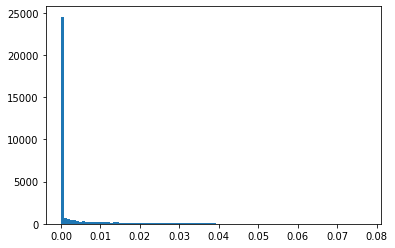

In [19]:
plt.hist( counts_atac[9], bins=100)

In [20]:
sum(counts_atac[9]<0)

0

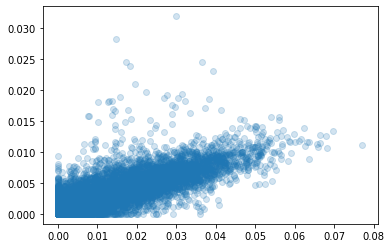

In [21]:
plt.scatter(counts_atac[9],  cprofile_atac[9], alpha=0.2)

In [22]:
cprofile_atac[9][cprofile_atac[9] == 0]

2        0.0
5        0.0
12       0.0
19       0.0
20       0.0
        ... 
33031    0.0
33033    0.0
33035    0.0
33041    0.0
33050    0.0
Name: 9, Length: 12638, dtype: float64

In [23]:
import scipy.stats

In [24]:
scipy.stats.pearsonr(cprofile_atac[9],counts_atac[9])

(0.8583051867660398, 0.0)

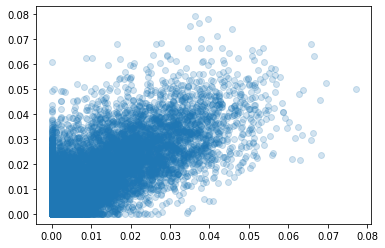

In [25]:
plt.scatter(counts_atac[9],  counts_dnase[9], alpha=0.2)

In [26]:
scipy.stats.pearsonr(counts_atac[9],counts_dnase[9])

(0.7986474607263774, 0.0)

In [27]:
scipy.stats.pearsonr(cprofile_atac[9],cprofile_dnase[9])

(0.7958878751219131, 0.0)

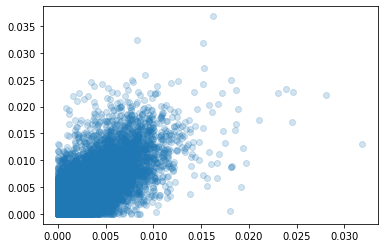

In [28]:
plt.scatter(cprofile_atac[9],  cprofile_dnase[9], alpha=0.2)

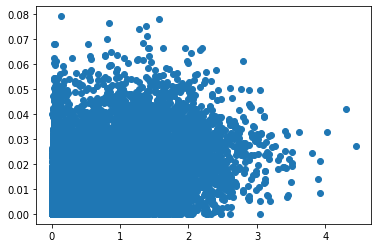

In [29]:
plt.scatter(tobias_atac[9],counts_dnase[9])

In [30]:
scipy.stats.pearsonr(tobias_atac[9][chip_labels[label_col]],counts_atac[10][chip_labels[label_col]])

KeyError: 10

In [ ]:
plt.scatter(tobias_atac[9][chip_labels[label_col]], counts_atac[10][chip_labels[label_col]] )